In [66]:
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
M1 = [10., 6.]
M2 = [11., 4.]
M3 = [8., 5.]
M4 = [3., 3.]
M5 = [2., 2.8]
M6 = [1., 1.]

X = np.array([M1,
             M2,
             M3,
             M4,
             M5,
             M6], dtype=float)
print(X)

[[10.   6. ]
 [11.   4. ]
 [ 8.   5. ]
 [ 3.   3. ]
 [ 2.   2.8]
 [ 1.   1. ]]


In [68]:
print(X.mean(axis=0))
print(X.var(axis=0, ddof=1))
print(X.std(axis=0, ddof=1))

[5.83333333 3.63333333]
[18.96666667  3.12666667]
[4.35507367 1.76823829]


In [69]:
x_ = np.array([[X[:,0].mean()],
             [X[:,1].mean()]]).T
X_ = np.ones(X.shape[0]).reshape(X.shape[0],1) @ x_
B = X - X_
print(B)
print()
print(B.mean(axis=0))
print(B.var(axis=0, ddof=1))
print(B.std(axis=0, ddof=1))

[[ 4.16666667  2.36666667]
 [ 5.16666667  0.36666667]
 [ 2.16666667  1.36666667]
 [-2.83333333 -0.63333333]
 [-3.83333333 -0.83333333]
 [-4.83333333 -2.63333333]]

[ 2.96059473e-16 -7.40148683e-17]
[18.96666667  3.12666667]
[4.35507367 1.76823829]


In [70]:
D = preprocessing.scale(X, with_mean=True, with_std=True)
print(D)
print()
print(D.mean(axis=0))
print(D.var(axis=0, ddof=1))
print(D.std(axis=0, ddof=1))

[[ 1.04805452  1.46617876]
 [ 1.29958761  0.22715446]
 [ 0.54498835  0.84666661]
 [-0.71267707 -0.3923577 ]
 [-0.96421016 -0.51626013]
 [-1.21574324 -1.63138201]]

[0.00000000e+00 7.40148683e-17]
[1.2 1.2]
[1.09544512 1.09544512]


In [71]:
E1 = B[:,0]/np.sqrt(np.var(X[:,0], ddof=1))
E2 = B[:,1]/np.sqrt(np.var(X[:,1], ddof=1))
E = np.array([E1, E2]).T
print(E)
print()
print(E.mean(axis=0))
print(E.var(axis=0, ddof=1))
print(E.std(axis=0, ddof=1))

[[ 0.9567385   1.33843197]
 [ 1.18635574  0.2073627 ]
 [ 0.49750402  0.77289734]
 [-0.65058218 -0.35817194]
 [-0.88019942 -0.47127886]
 [-1.10981666 -1.48924121]]

[0. 0.]
[1. 1.]
[1. 1.]


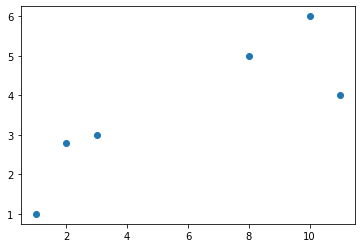

In [72]:
plt.scatter(X[:,0], X[:,1])

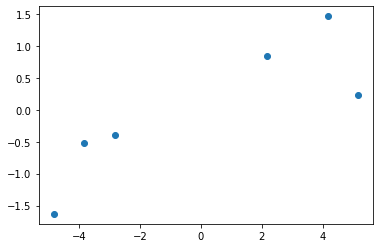

In [73]:
plt.scatter(B[:,0], D[:,1])

In [74]:
u, s, v = np.linalg.svd(D, full_matrices=False)
print(np.diag(s) / np.sum(s))
print()
print(v)

[[0.77367173 0.        ]
 [0.         0.22632827]]

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [75]:
T = B @ v
print(T)

[[-4.6197643  -1.27279221]
 [-3.91265752 -3.39411255]
 [-2.49844396 -0.56568542]
 [ 2.45130351  1.55563492]
 [ 3.29983165  2.12132034]
 [ 5.27973063  1.55563492]]


In [76]:
C = E.T @ E
print(C)
print("--")
eigen_vals, eigen_vecs = np.linalg.eig(C)
print(eigen_vals)
print()
print(eigen_vecs)

[[5.         4.21167924]
 [4.21167924 5.        ]]
--
[0.78832076 9.21167924]

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [77]:
# Calculate the variance explained on each of those components

variance_explained = [(i/sum(eigen_vals))*100 for i in eigen_vals]
print(variance_explained)

[7.88320761722467, 92.11679238277533]


In [78]:
pca = PCA() # create a PCA object
pca.fit(D) # do the math
pca_data = pca.transform(D) # get PCA coordinates for scaled_data
print(pca_data)

[[-1.77783141 -0.29565849]
 [-1.07956967  0.75832475]
 [-0.98404866 -0.21331874]
 [ 0.78137758 -0.2265    ]
 [ 1.04685058 -0.3167485 ]
 [ 2.01322157  0.29390099]]


In [79]:
print(pca.n_components_)
print()
print(pca.components_)
print()
print(pca.singular_values_)
print()
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_* 100)

2

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

[3.3247579  0.97261756]

[2.21080302 0.18919698]

[92.11679238  7.88320762]
